In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def read_excel(path, name_of_sheet):
    df = pd.read_excel(path, sheet_name= name_of_sheet)
    return df

In [3]:
df_transaction = read_excel('../Data FGD Batch II #001.xlsx', 'data')
df_customer = read_excel('../Data FGD Batch II #001.xlsx', 'customer')

In [4]:
print(df_transaction.shape)
print(df_customer.shape)

(2101, 12)
(343, 6)


# Quick Summary
1. Total of transaction
2. Total of customer
3. Total income
4. The 5 most frequently purchased items in 2 weeks
5. The 5 items with the largest total purchases
6. Percentage of payment method
7. Total transaction each day
8. Total income for food and drink

### 1. Total of transaction

In [5]:
total_transaction = df_transaction['ID_TRANSAKSI'].nunique()
print("Total transactions in 2 weeks:", total_transaction )

Total transactions in 2 weeks: 882


### 2. Total customer

In [6]:
total_customer = df_transaction['CUSTOMER_ID'].nunique()
print("Total customer in 2 weeks:", total_customer)

Total customer in 2 weeks: 335


### 3. Total Income in 2 weeks

In [7]:
total_income = df_transaction['TOTAL'].sum()
print("Total income in 2 weeks:", total_income)

Total income in 2 weeks: 44634500


### 4. The 5 most frequently purchased items in 2 weeks

In [8]:
top_5_fqp = df_transaction['ID_TRANSAKSI'].groupby(df_transaction['NAMA_ITEM']).count().reset_index(name='count').sort_values(by='count', ascending=False)
top_5_fqp

,NAMA_ITEM,count
8,MILK TEA BOBA,199
4,ES CENDOL,197
11,THAI TEA,185
1,BOLU,184
2,COOKIES BANANA,183
0,AMERICANO,177
10,SODA GEMBIRA,175
6,KUE LAPIS,174
9,ROTI BUN,167
3,COOKIES COCO,156


In [9]:
top_5_fqp.head()

,NAMA_ITEM,count
8,MILK TEA BOBA,199
4,ES CENDOL,197
11,THAI TEA,185
1,BOLU,184
2,COOKIES BANANA,183


### 5. The 5 items with the largest total purchases

In [10]:
top_5_pur = df_transaction['TOTAL'].groupby(df_transaction['NAMA_ITEM']).sum().reset_index(name='sum').sort_values(by='sum', ascending=False)
top_5_pur

,NAMA_ITEM,sum
8,MILK TEA BOBA,6690000
10,SODA GEMBIRA,6660000
4,ES CENDOL,5920000
11,THAI TEA,5530000
0,AMERICANO,4824000
7,LEMON TEA,3856000
5,KOPI SUSU,3584000
2,COOKIES BANANA,1689000
9,ROTI BUN,1617000
3,COOKIES COCO,1557000


In [11]:
top_5_pur.head()

,NAMA_ITEM,sum
8,MILK TEA BOBA,6690000
10,SODA GEMBIRA,6660000
4,ES CENDOL,5920000
11,THAI TEA,5530000
0,AMERICANO,4824000


### 6. Percentage of payment method

In [12]:
payment = df_transaction['ID_TRANSAKSI'].groupby(df_transaction['METODE_PEMBAYARAN']).nunique().reset_index(name='count').sort_values(by='count', ascending=False)
payment

,METODE_PEMBAYARAN,count
0,CASH,310
2,OVO,295
1,GOPAY,277


In [13]:
payment['percentage'] = round((payment['count']/total_transaction)*100,2)
payment

,METODE_PEMBAYARAN,count,percentage
0,CASH,310,35.15
2,OVO,295,33.45
1,GOPAY,277,31.41


### 7. Total transaction each day

In [14]:
df_transaction['ID_TRANSAKSI'].groupby(df_transaction['TANGGAL']).nunique().rename_axis('date').reset_index(name='count').sort_values(by='count', ascending=False)

,date,count
5,2020-11-07,79
1,2020-11-03,75
6,2020-11-08,74
2,2020-11-04,73
3,2020-11-05,73
12,2020-11-14,70
8,2020-11-10,69
10,2020-11-12,67
4,2020-11-06,66
13,2020-11-15,65


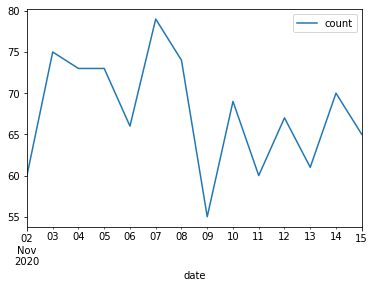

In [15]:
df_transaction['ID_TRANSAKSI'].groupby(df_transaction['TANGGAL']).nunique().rename_axis('date').reset_index(name='count').plot(x='date')

### 8. Total income for food and drink

In [16]:
income_fd = df_transaction['TOTAL'].groupby(df_transaction['KATEGORI']).sum().rename_axis('category').reset_index(name='sum')
income_fd

,category,sum
0,MAKANAN,7570500
1,MINUMAN,37064000


# Digging Insight
1. From the total income, describe the total income on each date
2. After that, show all information about the transactions that occurred on the date that had the largest amount of income
3. Select the most frequently purchased items and then find information about which people buy the most (e.g: subdistrict, gender)

-------------------------------------------
Conclution:
Since we already know what items are purchased most often and what kind of customers buy those items, we can recommend our shop to supply more

### 1. From the total income, describe the total income on each date

In [17]:
income_desc = df_transaction['TOTAL'].groupby(df_transaction['TANGGAL']).sum().rename_axis('date').reset_index(name='sum')
income_desc

,date,sum
0,2020-11-02,2105000
1,2020-11-03,2203500
2,2020-11-04,2596000
3,2020-11-05,3967000
4,2020-11-06,3816500
5,2020-11-07,3977000
6,2020-11-08,4794000
7,2020-11-09,1893500
8,2020-11-10,2082000
9,2020-11-11,2247000


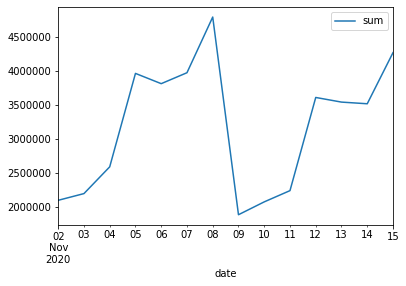

In [18]:
income_desc.plot(x='date')

In [19]:
income_desc.sort_values(by='sum', ascending=False).head()

,date,sum
6,2020-11-08,4794000
13,2020-11-15,4271500
5,2020-11-07,3977000
3,2020-11-05,3967000
4,2020-11-06,3816500


### 2. After that, show all information about the transactions that occurred on the date that had the largest amount of income

In [20]:
sum_total = df_transaction[df_transaction['TANGGAL'] == '2020-11-08']
sum_total

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN
952,502,C_188,953,6,SODA GEMBIRA,MINUMAN,4,12000,48000,2020-11-08,2,GOPAY
953,502,C_188,954,7,THAI TEA,MINUMAN,5,10000,50000,2020-11-08,2,GOPAY
954,502,C_188,955,11,KUE LAPIS,MAKANAN,7,2500,17500,2020-11-08,2,GOPAY
955,502,C_188,956,12,BOLU,MAKANAN,2,2500,5000,2020-11-08,2,GOPAY
956,504,C_565,957,2,LEMON TEA,MINUMAN,4,8000,32000,2020-11-08,7,GOPAY
...,...,...,...,...,...,...,...,...,...,...,...,...
1102,585,C_832,1103,10,ROTI BUN,MAKANAN,5,3000,15000,2020-11-08,7,GOPAY
1103,585,C_832,1104,12,BOLU,MAKANAN,2,2500,5000,2020-11-08,7,GOPAY
1104,586,C_556,1105,3,MILK TEA BOBA,MINUMAN,2,10000,20000,2020-11-08,7,OVO
1105,587,C_181,1106,4,AMERICANO,MINUMAN,6,8000,48000,2020-11-08,5,OVO


#### -- Who spent the most on that day?

In [21]:
sum_total['TOTAL'].groupby(sum_total['CUSTOMER_ID']).sum().rename_axis('Customer_ID').reset_index(name='sum').sort_values(by='sum', ascending=False)

,Customer_ID,sum
27,C_380,189000
68,C_593,169500
29,C_386,164000
41,C_449,161000
0,C_172,159000
...,...,...
2,C_175,6000
30,C_387,6000
8,C_210,5000
6,C_201,3000


In [22]:
sum_total[sum_total['CUSTOMER_ID'] == 'C_380']

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN
1028,542,C_380,1029,1,KOPI SUSU,MINUMAN,6,8000,48000,2020-11-08,7,CASH
1029,542,C_380,1030,3,MILK TEA BOBA,MINUMAN,5,10000,50000,2020-11-08,7,CASH
1030,542,C_380,1031,4,AMERICANO,MINUMAN,5,8000,40000,2020-11-08,7,CASH
1031,542,C_380,1032,5,ES CENDOL,MINUMAN,3,10000,30000,2020-11-08,7,CASH
1032,542,C_380,1033,9,COOKIES BANANA,MAKANAN,6,3000,18000,2020-11-08,7,CASH
1033,542,C_380,1034,10,ROTI BUN,MAKANAN,1,3000,3000,2020-11-08,7,CASH


### 3. Select the most frequently purchased items (Boba) and then find information about which people buy the most (e.g: subdistrict, gender)


#### -- First, join transaction data and customer data

In [23]:
df_join = df_transaction.merge(df_customer, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID')
df_join.shape

(2101, 17)

#### -- Transform Born Date data to make Age column

In [24]:
now = pd.to_datetime('now')


In [25]:
df_join['AGE'] = (now.year - df_join['BORN_DATE'].dt.year) - ((now.month - df_join['BORN_DATE'].dt.month) < 0)
df_join

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT,AGE
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
2,597,C_4,1116,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-09,7,OVO,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,19
3,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu,27
4,336,C_38,631,1,KOPI SUSU,MINUMAN,5,8000,40000,2020-11-06,11,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,1051,C_920,2003,10,ROTI BUN,MAKANAN,5,3000,15000,2020-11-14,7,GOPAY,2020-08-12,1987-09-03,M,South Jakarta,Cilandak,33
2097,1051,C_920,2157,7,THAI TEA,MINUMAN,3,10000,30000,2020-11-15,7,GOPAY,2020-08-12,1987-09-03,M,South Jakarta,Cilandak,33
2098,1051,C_920,2158,8,COOKIES COCO,MAKANAN,1,3000,3000,2020-11-15,7,GOPAY,2020-08-12,1987-09-03,M,South Jakarta,Cilandak,33
2099,1057,C_904,2010,12,BOLU,MAKANAN,4,2500,10000,2020-11-14,4,GOPAY,2020-08-01,1987-09-03,F,South Jakarta,Tebet,33


#### -- Select cloumns that will you use

In [26]:
df_join = df_join[['ID_TRANSAKSI','CUSTOMER_ID','BORN_DATE','AGE','GENDER','SUBDISTRICT','NAMA_ITEM','KATEGORI','QTY','HARGA','TOTAL','METODE_PEMBAYARAN','TANGGAL']]
df_join.head()

,ID_TRANSAKSI,CUSTOMER_ID,BORN_DATE,AGE,GENDER,SUBDISTRICT,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,METODE_PEMBAYARAN,TANGGAL
0,2,C_4,2001-03-23,19,F,Setiabudi,LEMON TEA,MINUMAN,1,8000,8000,CASH,2020-11-02
1,2,C_4,2001-03-23,19,F,Setiabudi,COOKIES COCO,MAKANAN,2,3000,6000,CASH,2020-11-02
2,597,C_4,2001-03-23,19,F,Setiabudi,ROTI BUN,MAKANAN,2,3000,6000,OVO,2020-11-09
3,3,C_38,1993-02-17,27,F,Pasar Minggu,ES CENDOL,MINUMAN,1,10000,10000,CASH,2020-11-02
4,336,C_38,1993-02-17,27,F,Pasar Minggu,KOPI SUSU,MINUMAN,5,8000,40000,CASH,2020-11-06


In [27]:
boba = df_join[df_join['NAMA_ITEM'] == 'MILK TEA BOBA']
print(boba.shape)
boba

(199, 13)


,ID_TRANSAKSI,CUSTOMER_ID,BORN_DATE,AGE,GENDER,SUBDISTRICT,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,METODE_PEMBAYARAN,TANGGAL
9,1078,C_38,1993-02-17,27,F,Pasar Minggu,MILK TEA BOBA,MINUMAN,5,10000,50000,OVO,2020-11-14
20,181,C_27,1999-03-15,21,M,Cilandak,MILK TEA BOBA,MINUMAN,2,10000,20000,CASH,2020-11-04
23,633,C_27,1999-03-15,21,M,Cilandak,MILK TEA BOBA,MINUMAN,2,10000,20000,CASH,2020-11-09
29,9,C_49,1995-01-27,25,F,Setiabudi,MILK TEA BOBA,MINUMAN,2,10000,20000,GOPAY,2020-11-02
50,888,C_33,1987-10-22,33,M,Pasar Minggu,MILK TEA BOBA,MINUMAN,1,10000,10000,OVO,2020-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,875,C_908,1983-10-13,37,F,Pasar Minggu,MILK TEA BOBA,MINUMAN,1,10000,10000,OVO,2020-11-12
2055,1025,C_903,2002-08-06,18,F,Setiabudi,MILK TEA BOBA,MINUMAN,8,10000,80000,GOPAY,2020-11-15
2073,924,C_916,1994-12-05,26,M,Tebet,MILK TEA BOBA,MINUMAN,5,10000,50000,GOPAY,2020-11-13
2078,1064,C_916,1994-12-05,26,M,Tebet,MILK TEA BOBA,MINUMAN,3,10000,30000,GOPAY,2020-11-14


#### -- Check is there any duplicate data

In [28]:
duplicateRowsDF = boba[boba.duplicated()]
duplicateRowsDF

,ID_TRANSAKSI,CUSTOMER_ID,BORN_DATE,AGE,GENDER,SUBDISTRICT,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,METODE_PEMBAYARAN,TANGGAL


#### -- Count boba transaction for each day

In [29]:
# boba_tday = boba['ID_TRANSAKSI'].groupby(boba['TANGGAL']).count().reset_index(name='count').sort_values(by='TANGGAL')
# boba_tday
boba_tday = boba[['TANGGAL','ID_TRANSAKSI','QTY']]
boba_tday = boba_tday.groupby(['TANGGAL']).agg({
    'ID_TRANSAKSI':'count',
    'QTY': 'sum'
})
boba_tday.sort_values(by='TANGGAL')

,ID_TRANSAKSI,QTY
TANGGAL,,
2020-11-02,14,35
2020-11-03,11,26
2020-11-04,18,40
2020-11-05,14,53
2020-11-06,13,52
2020-11-07,15,48
2020-11-08,17,67
2020-11-09,13,33
2020-11-10,12,32


In [45]:
boba_tday.sort_values(by='ID_TRANSAKSI', ascending=False).head()

,ID_TRANSAKSI,QTY
TANGGAL,,
2020-11-14,20,71
2020-11-04,18,40
2020-11-08,17,67
2020-11-07,15,48
2020-11-15,15,89


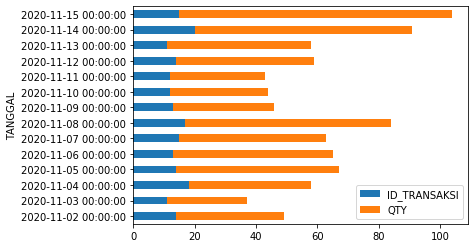

In [30]:
boba_tday.plot.barh(stacked=True)

#### -- Boba's income for each day

In [46]:
boba_income = boba['TOTAL'].groupby(boba['TANGGAL']).sum().reset_index(name='sum').sort_values(by='TANGGAL')
boba_income

,TANGGAL,sum
0,2020-11-02,350000
1,2020-11-03,260000
2,2020-11-04,400000
3,2020-11-05,530000
4,2020-11-06,520000
5,2020-11-07,480000
6,2020-11-08,670000
7,2020-11-09,330000
8,2020-11-10,320000
9,2020-11-11,310000


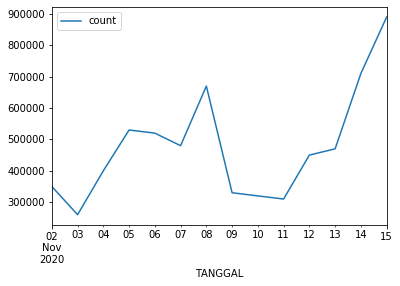

In [32]:
boba_income.plot(x='TANGGAL')

#### -- Find the subdistrict where the Boba is more often purchased

In [33]:
boba_district = boba['ID_TRANSAKSI'].groupby(boba['SUBDISTRICT']).count().reset_index(name='count').sort_values(by='count', ascending=False)
boba_district

,SUBDISTRICT,count
5,Setiabudi,48
0,Cilandak,47
6,Tebet,43
4,Pasar Minggu,40
3,Mampang Prapatan,12
2,Kebayoran Baru,5
1,Jagakarsa,4


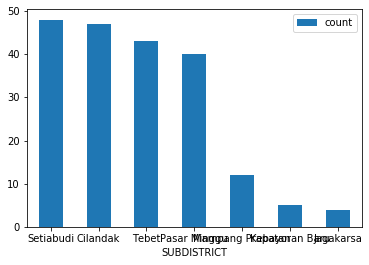

In [34]:
boba_district.plot.bar(x='SUBDISTRICT', y='count', rot=0)

#### -- Aggregate qty and total data in boba

In [50]:
boba_agg = boba[['SUBDISTRICT','ID_TRANSAKSI','QTY','TOTAL']]
boba_agg = boba_agg.groupby(['SUBDISTRICT']).agg({
    'ID_TRANSAKSI':'count',
    'QTY': 'sum',
    'TOTAL': 'sum'
})
boba_agg.rename(columns={
    'ID_TRANSAKSI': 'Count Transaction',
    'QTY': 'Count Qty',
    'TOTAL': 'sum'
}, inplace=True)
boba_agg.sort_values(by='sum', ascending=False)

,Count Transaction,Count Qty,sum
SUBDISTRICT,,,
Cilandak,47,164,1640000
Setiabudi,48,164,1640000
Tebet,43,134,1340000
Pasar Minggu,40,133,1330000
Mampang Prapatan,12,38,380000
Kebayoran Baru,5,23,230000
Jagakarsa,4,13,130000


#### -- Who bought boba?

In [36]:
cus_boba = boba[['GENDER','AGE']]
cus_boba = cus_boba.groupby(['GENDER']).agg({
    'GENDER': 'count',
    'AGE': 'mean'
})
cus_boba

,GENDER,AGE
GENDER,,
F,95,26.273684
M,104,26.144231


In [52]:
cus_boba2 = boba['ID_TRANSAKSI'].groupby(boba['AGE']).count().reset_index(name='count')
cus_boba2

,AGE,count
0,17,5
1,18,14
2,19,19
3,20,14
4,21,10
5,22,8
6,23,9
7,24,10
8,25,9
9,26,16


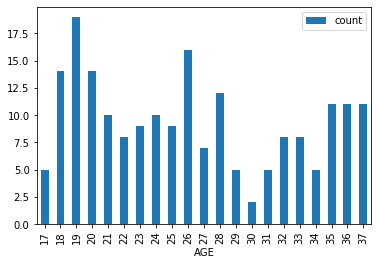

In [38]:
cus_boba2.plot.bar(x='AGE', y ='count')

#### -- Boba mostly paid by what method?

In [39]:
boba_paymet = boba['ID_TRANSAKSI'].groupby(boba['METODE_PEMBAYARAN']).count().reset_index(name='count')
boba_paymet

,METODE_PEMBAYARAN,count
0,CASH,69
1,GOPAY,54
2,OVO,76


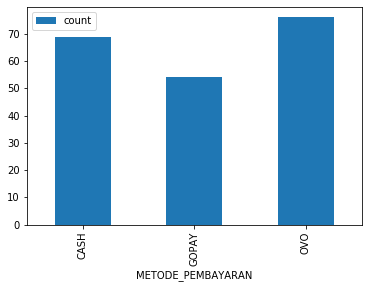

In [40]:
boba_paymet.plot.bar(x='METODE_PEMBAYARAN', y='count')

In [41]:
#df_transaction.groupby(['ID_TRANSAKSI','NAMA_ITEM']).TOTAL.sum()

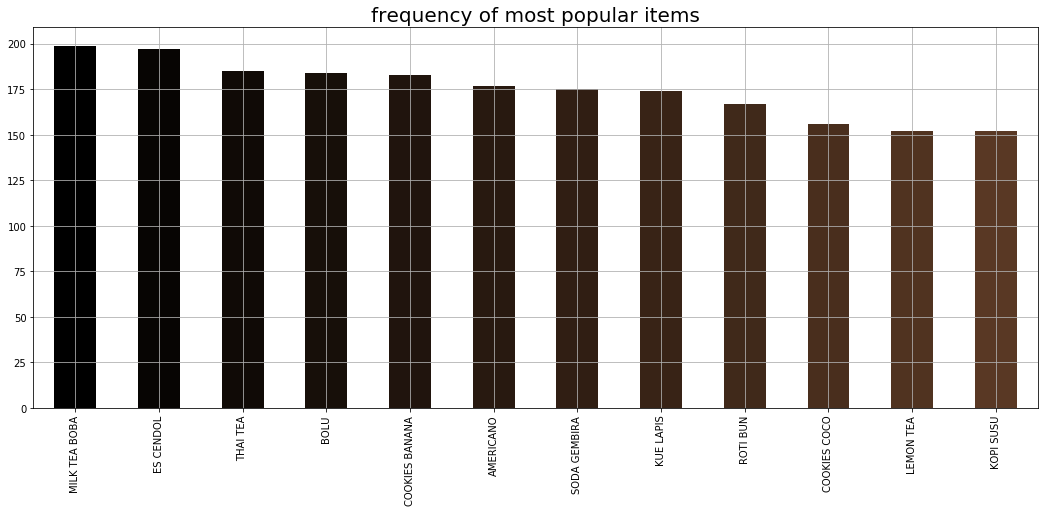

In [42]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df_transaction['NAMA_ITEM'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()